In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_process = pd.read_csv("entrada.csv")
alarm_var = pd.read_csv("alarm_list.csv")

In [73]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [100]:
def alarm_generate(x, limit, type_var, delay_time, dead_band):
    
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
    
    if type_var == 'high':
        for i in np.arange(len(x)):
            if x[i] > limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= delay_time:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= dead_band:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= delay_time:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= dead_band:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm 

In [75]:
x0 = step_signal(3,7)
x1 = step_signal(3,7,0.2,0.3,20,100,20,100,0.5,100)

pd.options.display.max_rows = len(x0)

if len(x0) > len(x1):
    if x1[len(x1)-1] >= 2.8 and x1[len(x1)-1] <= 3.2:
        x1 = np.concatenate((x1,np.random.uniform(3-0.2,3+0.2,len(x0)-len(x1))))
    elif x1[len(x1)-1] >= 6.7 and x1[len(x1)-1] <= 7.3:
        x1 = np.concatenate((x1,np.random.uniform(7-0.3,7+0.3,len(x0)-len(x1))))
else:
    delete = np.nonzero(x1[len(x0):])
    x1 = np.delete(x1,delete)
    
tout = np.arange(0,3,3/len(x0),dtype=float)
df = pd.DataFrame({'tout': tout})
df['x0'] = x0
df['x1'] = x1   
df['log'] = 0 
df.head()

,tout,x0,x1,log
0,0.000000,7.025760,6.999999,0
1,0.000529,7.151031,6.887462,0
2,0.001059,7.091125,7.277603,0
3,0.001588,7.061502,6.794497,0
4,0.002118,7.194680,7.210138,0


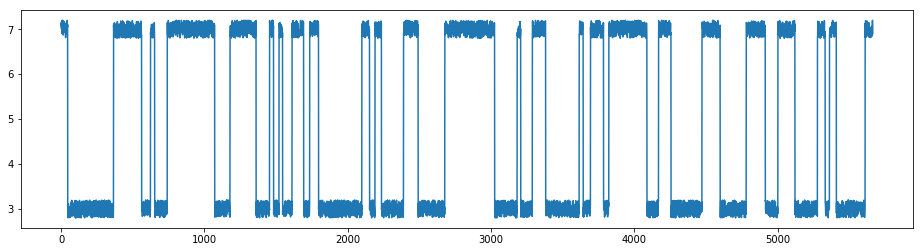

In [76]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])


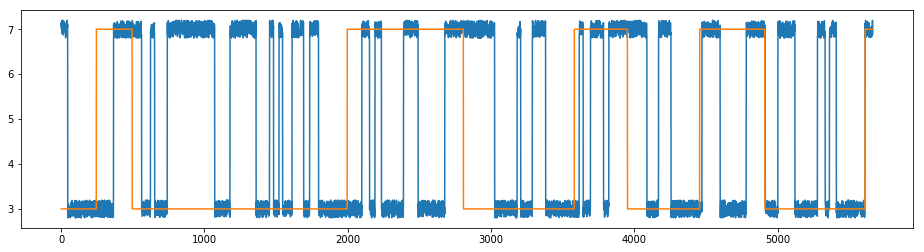

In [103]:

log_alarm = alarm_generate(df['x0'], 5, 'low', 200*3/len(df['x0']), 130*3/len(df['x0']))


plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(log_alarm*4+3)


In [114]:
x = []
for i in np.arange(10):
    x.append(step_signal(3,7))

In [115]:
x

[array([2.85511208, 3.16887632, 2.99591994, ..., 3.13454563, 2.84796105,
        3.07801262]),
 array([3.16230746, 3.1753631 , 3.06188414, ..., 2.86358936, 2.88510887,
        3.18770411]),
 array([3.04443955, 2.86475223, 3.03350287, ..., 3.15768787, 2.84345633,
        3.19024134]),
 array([6.91444614, 6.82873997, 7.12743188, ..., 7.17520376, 6.81576032,
        6.88084416]),
 array([2.91576001, 2.98635968, 3.00519297, ..., 2.93827555, 2.80209752,
        3.19724541]),
 array([7.10302058, 7.1393448 , 7.08672009, ..., 3.15977534, 3.14124977,
        3.11044781]),
 array([2.85902427, 3.10944743, 2.85349751, ..., 7.19643471, 7.148152  ,
        7.10907513]),
 array([7.02667037, 6.98542391, 6.99811695, ..., 7.14380854, 6.8308815 ,
        7.09889015]),
 array([7.12719186, 6.90777635, 7.02013521, ..., 2.82609026, 2.8767288 ,
        2.87147008]),
 array([7.19056717, 7.19298421, 7.10764336, ..., 2.81120435, 3.02827323,
        3.09972772])]

In [ ]:

for i in np.arange(10):
    if len(x[0]) > len(x[i]):
        if x[i][-1] >= 2.8 and x[i][-1] <= 3.2:
            x1 = np.concatenate((x[i],np.random.uniform(3-0.2,3+0.2,len(x0)-len(x1))))
        elif x1[len(x1)-1] >= 6.7 and x1[len(x1)-1] <= 7.3:
            x1 = np.concatenate((x1,np.random.uniform(7-0.3,7+0.3,len(x0)-len(x1))))
    else:
        delete = np.nonzero(x1[len(x0):])
        x1 = np.delete(x1,delete)
    
tout = np.arange(0,3,3/len(x0),dtype=float)
df = pd.DataFrame({'tout': tout})




df = pd.DataFrame({'tout': tout})

3.078012616152199